<a href="https://colab.research.google.com/github/hyukstory/hyukstory_AI/blob/main/%EC%BD%94%EB%A1%9C%EB%82%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/jmani0223/machine_learning/master/dataset/'

In [ ]:
#기본 데이터 
case_df = pd.read_csv(url+'Case.csv')
PatientInfo_df = pd.read_csv(url + 'PatientInfo.csv')
PatientRoute_df = pd.read_csv(url + 'PatientRoute.csv')
Policy_df = pd.read_csv(url + 'Policy.csv')
Region_df = pd.read_csv(url + 'Region.csv')
SearchTrend_df = pd.read_csv(url + 'SearchTrend.csv')
SeoulFloating_df = pd.read_csv(url + 'SeoulFloating.csv')
Time_df = pd.read_csv(url + 'Time.csv')
TimeAge_df = pd.read_csv(url + 'TimeAge.csv')
TimeGender_df = pd.read_csv(url + 'TimeGender.csv')
TimeProvince_df = pd.read_csv(url + 'TimeProvince.csv')
Weather_df = pd.read_csv(url + 'Weather.csv')


# 가설 : 온도가 높을수록 확진자 수 가 증가할 것이다. (Weather, Time)

## 0) 일별 확진자 데이터 전처리

In [ ]:
#기본 'Time'이 변형되지 않게 데이터 복사1,2
Time_df1 = Time_df.copy()
Time_df2 = Time_df.copy()

# 'date' 인덱스 값을 하나씩 미뤄서 저장해주고, 모양 맞추기
Time_df1['save'] = Time_df1['date']
Time_df1.drop(0, axis = 'index', inplace=True)
Time_df2.drop(101, axis = 'index', inplace=True)
Time_df2.set_index(Time_df1['save'], inplace=True)
Time_df1.set_index('date', inplace=True)
Time_df2.head(2)

,date,time,test,negative,confirmed,released,deceased
save,,,,,,,
2020-01-21,2020-01-20,16,1,0,1,0,0
2020-01-22,2020-01-21,16,1,0,1,0,0


In [ ]:
#일별 데이터프레임으로 따로 저장
Time_daily_df = Time_df1 - Time_df2

#더 이상 필요없는 칼럼 제거
Time_daily_df.drop(['date','save', 'time'],
                    axis = 'columns', inplace=True)

#그래프를 그리기 위한 작업
Time_daily_df.reset_index(inplace=True)
Time_daily_df.rename(columns={'confirmed' : 'daily_confirmed'},inplace=True)
Time_daily_df.head(2)

,date,daily_confirmed,deceased,negative,released,test
0,2020-01-21,0,0,0,0,0
1,2020-01-22,0,0,3,0,3


## 1) Time으로 누적 현황 그래프 파악


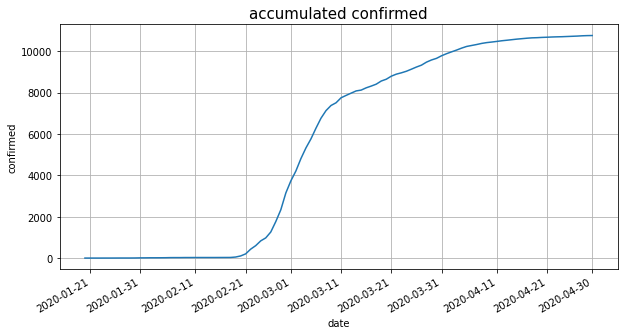

In [ ]:
fig, ax1 = plt.subplots()


ax1.plot(Time_df['date'], Time_df['confirmed'], '-')
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed')

ax1.set_xticks(['2020-01-21', '2020-01-31', '2020-02-11', '2020-02-21',
                '2020-03-01', '2020-03-11', '2020-03-21', '2020-03-31',
                '2020-04-11', '2020-04-21', '2020-04-30'])
fig.autofmt_xdate(rotation=30)

plt.rcParams["figure.figsize"] = (10, 5)
plt.grid(True)
plt.title('accumulated confirmed', fontsize= 15)
plt.show()

## 2) 일별 확진자 데이터를 그래프로 표현

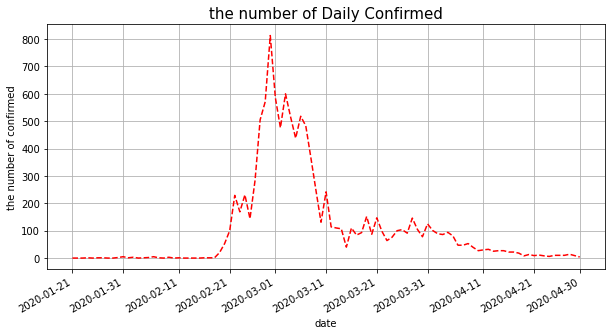

In [ ]:
fig, daily_confirmed = plt.subplots()

daily_confirmed.plot(Time_daily_df['date'], Time_daily_df['daily_confirmed'], 'r--')
daily_confirmed.set_title('the number of Daily Confirmed', fontsize= 15)
daily_confirmed.set_xlabel('date')
daily_confirmed.set_ylabel('the number of confirmed')
daily_confirmed.set_xticks(['2020-01-21', '2020-01-31', '2020-02-11', '2020-02-21',
                '2020-03-01', '2020-03-11', '2020-03-21', '2020-03-31',
                '2020-04-11', '2020-04-21', '2020-04-30'])
fig.autofmt_xdate(rotation=30)

plt.rcParams["figure.figsize"] = (10, 5)
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

## 3) 전국 평균 날씨 데이터를 시계열 그래프로 표현


In [ ]:
Weather_avg_df = Weather_df.copy()

#처음부터 필요 없는(ex. 2016년 날씨, 풍량 등) 칼럼 데이터 전처리 과정
Weather_avg_df.drop(['precipitation','max_wind_speed','most_wind_direction','avg_relative_humidity'],
                    axis = 'columns', inplace=True)

#2020-01-20 ( 인덱스 번호 23679번 )부터 날씨 데이터만 남기기.
for i in range (0,23679):
    Weather_avg_df.drop(i, axis = 'index', inplace=True)

Weather_avg_df.head(2)

,code,province,date,avg_temp,min_temp,max_temp
23679,10000,Seoul,2020-01-20,0.7,-3.3,5.5
23680,11000,Busan,2020-01-20,5.1,1.6,9.8


In [ ]:
#groupby 하고 '날짜별 평균 기온'(daily_avg_temp) 추가.
Weather_avg_df['daily_avg_temp'] = Weather_avg_df.groupby(['date'])['avg_temp'].transform('mean')

#더 이상 필요없는 칼럼 제거
Weather_avg_df.drop(['max_temp','min_temp', 'province', 'code', 'avg_temp']
                    , axis = 'columns', inplace=True)

#인덱스로 date 지정
Weather_avg_df.set_index('date', inplace=True)

#날짜 중복 값이 많으므로, 중복 값 다시 합치기.
Weather_avg_df = Weather_avg_df.groupby(['date']).mean()
Weather_avg_df.reset_index(inplace=True)
Weather_avg_df.head(2)

,date,daily_avg_temp
0,2020-01-20,3.47500
1,2020-01-21,1.89375


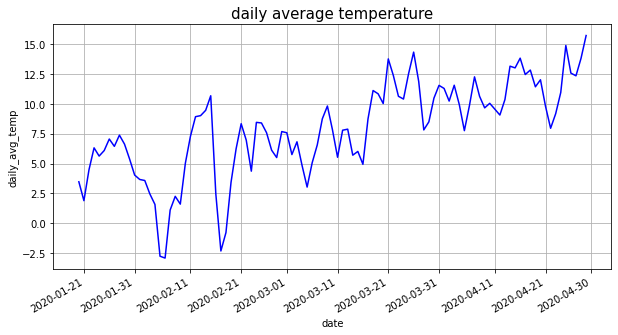

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(Weather_avg_df['date'], Weather_avg_df['daily_avg_temp'], 'b-')
ax1.set_xlabel('date')
ax1.set_ylabel('daily_avg_temp')

ax1.set_xticks(['2020-01-21', '2020-01-31', '2020-02-11', '2020-02-21',
                '2020-03-01', '2020-03-11', '2020-03-21', '2020-03-31',
                '2020-04-11', '2020-04-21', '2020-04-30'])
fig.autofmt_xdate(rotation=30)

plt.title('daily average temperature', fontsize = 15)
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid(True)
plt.show()

In [ ]:
result = pd.merge(Time_daily_df, Weather_avg_df, on='date')
print(result['date'])

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
95    2020-04-25
96    2020-04-26
97    2020-04-27
98    2020-04-28
99    2020-04-29
Name: date, Length: 100, dtype: object


## 4) 그래프 겹쳐서 추이 비교


일별 확진자 데이터  : daily_confirmed

전국 평균 날씨 데이터 : Weather_avg_df

In [ ]:
print(Time_daily_df)  # 첫 셀 누락값 발견
print(Weather_avg_df)


Time_daily_df = Time_daily_df.fillna(0) # 누락값 0으로 변경

           date  daily_confirmed  deceased  negative  released  test
0    2020-01-21                0         0         0         0     0
1    2020-01-22                0         0         3         0     3
2    2020-01-23                0         0        18         0    18
3    2020-01-24                1         0         4         0     5
4    2020-01-25                0         0         0         0     0
..          ...              ...       ...       ...       ...   ...
96   2020-04-26               10         2      3374        82  3124
97   2020-04-27               10         1      3469        47  3375
98   2020-04-28               14         1      6532        90  6854
99   2020-04-29                9         2      6570        68  5683
100  2020-04-30                4         1      5353       137  5684

[101 rows x 6 columns]
           date  daily_avg_temp
0    2020-01-20         3.47500
1    2020-01-21         1.89375
2    2020-01-22         4.48125
3    2020-01-23     

In [ ]:
# y축 범위 지정 위해 요약 통계 확인
Time_daily_df.describe()
Weather_avg_df.describe()

,daily_avg_temp
count,101.000000
mean,7.868317
std,3.930953
min,-2.906250
25%,5.525000
50%,7.950000
75%,10.625000
max,15.706250


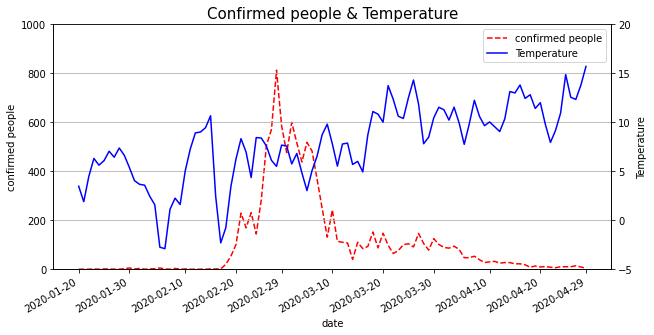

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 일별 확진자 그래프
line1 = ax1.plot(Time_daily_df['date'] , Time_daily_df['daily_confirmed'] , 
                 'r--', label = "confirmed people")
# 일별 전국 평균 날씨 그래프
line2 = ax2.plot(Weather_avg_df['date'] , Weather_avg_df['daily_avg_temp'] , 
                 'b-', label = "Temperature")

ax1.set_xlabel('date')
ax1.set_ylabel('confirmed people')
ax2.set_ylabel('Temperature')

ax1.set_ylim(0, 1000)
ax2.set_ylim(-5, 20)

ax1.set_xticks(['2020-01-21', '2020-01-31', '2020-02-11', '2020-02-21',
                '2020-03-01', '2020-03-11', '2020-03-21', '2020-03-31',
                '2020-04-11', '2020-04-21', '2020-04-30'])
fig.autofmt_xdate(rotation=30)

# 범례 표시
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')


plt.title('Confirmed people & Temperature', fontsize = 15)
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid(True)
plt.show()

## 2. 검색 트랜드 별 코로나 검사 횟수 추이

In [ ]:
#필요없는 데이터 전처리 
for i in range (0,1481):
    SearchTrend_df.drop(i, axis = 'index', inplace=True)
SearchTrend_df.set_index('date', inplace=True)
SearchTrend_df['Total_Search'] = SearchTrend_df.sum(axis=1)
SearchTrend_df.reset_index(inplace=True)
SearchTrend_df.head(2)

,date,cold,flu,pneumonia,coronavirus,Total_Search
0,2020-01-21,0.22462,0.59789,4.31987,35.33284,40.47522
1,2020-01-22,0.23808,0.56661,3.66416,29.74474,34.21359


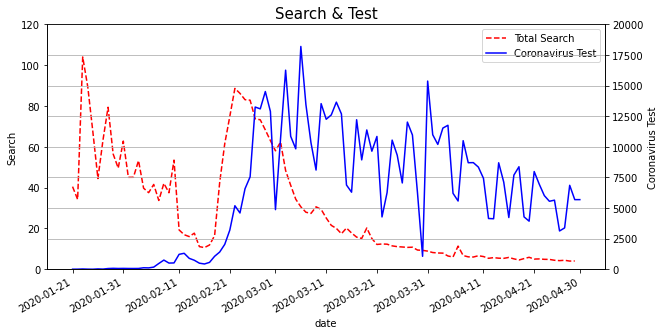

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(SearchTrend_df['date'] , SearchTrend_df['Total_Search'] , 
                 'r--', label = "Total Search")
line2 = ax2.plot(Time_daily_df['date'] , Time_daily_df['test'] , 
                 'b-', label = "Coronavirus Test")


ax1.set_xlabel('date')
ax1.set_ylabel('Search')
ax2.set_ylabel('Coronavirus Test')

ax1.set_ylim(0, 120)
ax2.set_ylim(0, 20000)

ax1.set_xticks(['2020-01-21', '2020-01-31', '2020-02-11', '2020-02-21',
                '2020-03-01', '2020-03-11', '2020-03-21', '2020-03-31',
                '2020-04-11', '2020-04-21', '2020-04-30'])
fig.autofmt_xdate(rotation=30)

# 범례 표시
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')


plt.title('Search & Test', fontsize = 15)
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid(True)
plt.show()